<a href="https://colab.research.google.com/github/Inno732/Data-Mining-Project-Jerome-Inno/blob/main/Active_Learning_Labfiche2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!nvidia-smi
!rm -rf sample_data

/bin/bash: line 1: nvidia-smi: command not found


In [76]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [77]:
Knn = KNeighborsClassifier(n_neighbors=7)
class_svc = SVC(probability=True)
class_rf = RandomForestClassifier()

In [78]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#%cd drive/My\ Drive/MYPATH
%cd drive/My Drive/Dataset colab

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-79-3b5c92bacb01>", line 2, in <cell line: 2>
    get_ipython().run_line_magic('cd', 'drive/My Drive/Dataset colab')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/in

In [ ]:
train = pd.read_table("XYtrain.dat", sep="\s+")
test = pd.read_table("XYtest.dat", sep="\s+")
print(train)
#print(test)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-79-43d5e097eb12>", line 1, in <cell line: 1>
    train = pd.read_table("XYtrain.dat", sep="\s+")
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1289, in read_table
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1442, in __init__
    self._engine = s

In [79]:
train.columns = [ 'X', 'Y', 'label']
test.columns = ['X', 'Y', 'label']

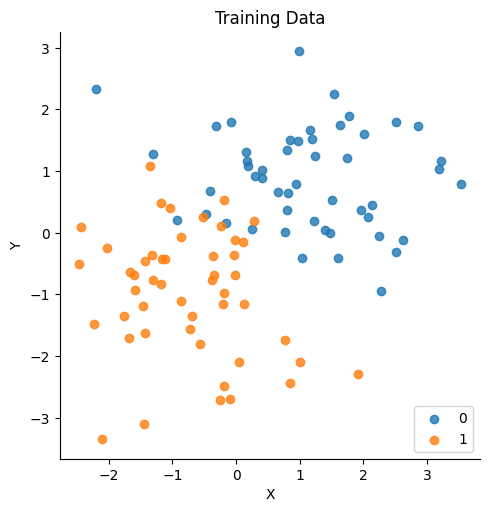

In [80]:
sns.lmplot( x="X", y="Y", data=train, fit_reg=False, hue='label', legend=False)
plt.legend(loc='lower right')
plt.title('Training Data')
plt.show()

  **2-Build a kNN classifier**

In [81]:
# Split the data into features (X) and target (y)
X = train.drop('label', axis=1)
y = train['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# Split the data into features (X) and target (y)
X_train = train.drop('label', axis=1)
y_train = train['label']
X_test = test.drop('label', axis=1)
y_test = test['label']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
# Fitting the model
Knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [84]:
y_pred = Knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9179179179179179


**3- Sélection aléatoire des données train**

In [85]:
train_shuffled = train.sample(frac=1).reset_index(drop=True)[0:10]
# Split the data into features (X) and target (y)
X_train_shuffled = train_shuffled.drop('label', axis=1)
y_train_shuffled = train_shuffled['label']

# Scale the features using StandardScaler
X_train_shuffled = scaler.fit_transform(X_train_shuffled)
# Fitting the model
Knn.fit(X_train_shuffled, y_train_shuffled)
y_pred_shuffled = Knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_shuffled)
print("Accuracy:", accuracy)

Accuracy: 0.9039039039039038


**4 Another training**

In [86]:
history = []
for i in range(50):
  train_shuffled = train.sample(frac=1).reset_index(drop=True)[0:10]
  # Split the data into features (X) and target (y)
  X_train_shuffled = train_shuffled.drop('label', axis=1)
  y_train_shuffled = train_shuffled['label']

  # Scale the features using StandardScaler
  X_train_shuffled = scaler.fit_transform(X_train_shuffled)
  # Fitting the model
  Knn.fit(X_train_shuffled, y_train_shuffled)
  y_pred_shuffled = Knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_shuffled)

  history.append(accuracy)

mean_acc_shuffle = np.mean(history)
print(mean_acc_shuffle)

0.7642042042042041


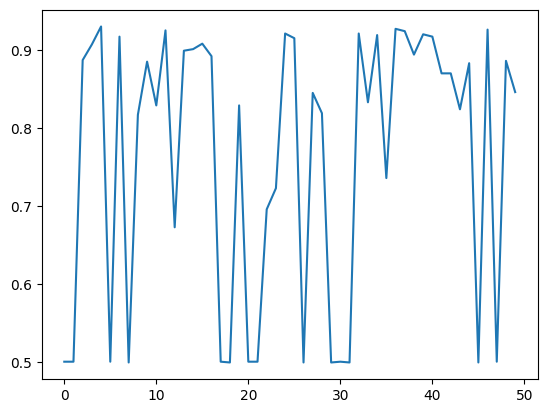

In [87]:
x_vals = range(0, 50)
plt.plot(x_vals, history)

In [88]:
history_emp = []
for n in np.arange(10, 61):
  train_0 = train[train.label == 0][0:n*8//10]
  train_1 = train[train.label == 1][0:n*2//10]
  train_det = pd.concat([train_0, train_1])

  # Split the data into features (X) and target (y)
  X_train_det = train_det.drop('label', axis=1)
  y_train_det = train_det['label']

  # Scale the features using StandardScaler
  scaler = StandardScaler()
  X_train_det = scaler.fit_transform(X_train_det)

  # Fitting the model
  Knn.fit(X_train_det, y_train_det)
  y_pred = Knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  history_emp.append(accuracy)
mean_acc_deter = np.mean(history_emp)

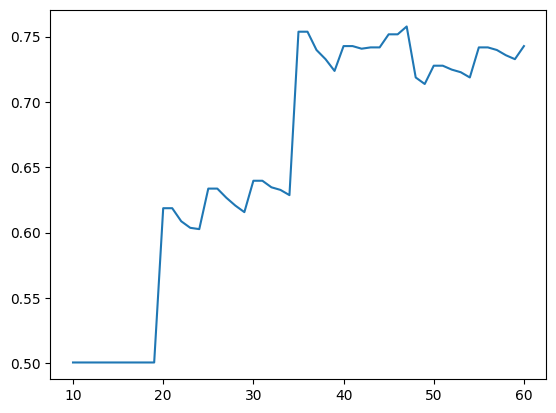

In [89]:
x_vals = np.arange(10, 61)
plt.plot(x_vals, history_emp)

**5 - Repeat the training 50 times**

In [90]:
history_acc_deter = []
#history_emp = []
for n in np.arange(10, 61):
  history_acc_emp = []
  for i in range(50):
    train_shuffled = train.sample(frac=1).reset_index(drop=True)
    train_0 = train_shuffled[train_shuffled.label == 0][0:n*8//10]
    train_1 = train_shuffled[train_shuffled.label == 1][0:n*2//10]
    train_det = pd.concat([train_0, train_1])

    # Split the data into features (X) and target (y)
    X_train_det = train_det.drop('label', axis=1)
    y_train_det = train_det['label']

    # Scale the features using StandardScaler
    scaler = StandardScaler()
    X_train_det = scaler.fit_transform(X_train_det)

    # Fitting the model
    Knn.fit(X_train_det, y_train_det)
    y_pred = Knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    history_acc_emp.append(accuracy)
#  history_emp.append(history_acc_emp)
  mean_acc_emp = np.mean(history_acc_emp)
  history_acc_deter.append(mean_acc_emp)

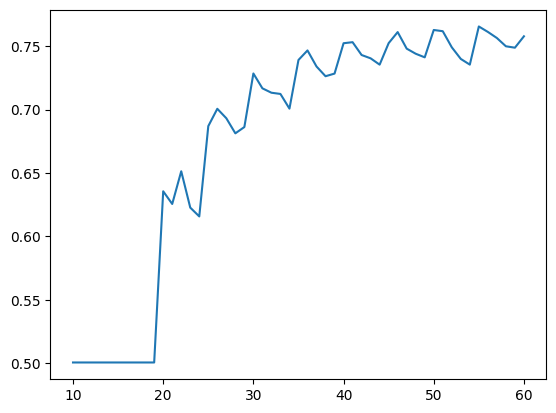

In [91]:
x_vals = np.arange(10, 61)
plt.plot(x_vals, history_acc_deter)

**6. Instead of randomly adding new samples, use the active learning method to progressively select new training samples**